In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

# Multi Dimensional Arrays

As mentioned previously, NumPy can be used to represent arrays of any size and dimension. Though all the examples above have used one-dimensional arrays, all of them will work when we have more than one dimension. For example, a list of lists can be used to initialize a two dimensional array just like a list was used to initialize a one dimensional array. All the array attributes also work similarly.

In [2]:
arr_2d_1 = np.array([[1, 2, 3], [4, 5, 6]])

In [3]:
print(arr_2d_1)

[[1 2 3]
 [4 5 6]]


In [4]:
arr_2d_1.shape

(2, 3)

In [5]:
arr_2d_1.ndim

2

`arr_2d_1` has a dimension of 2 i.e. it has two axes (`0` and `1`, since everything in Python is counted from 0). The **0th axis has 2** elements while the **1st axis has 3** elements.

Most of the functions to generate arrays listed above can be used with more than one dimension, for example

In [6]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [7]:
np.random.randn(2,3)

array([[-0.88390089, -0.81058194, -0.05025605],
       [-1.32538296,  1.17259808,  0.65008993]])

Similarly all element wise operations happen similarly on multi-dimensional arrays including binary operations between two arrays.

In [8]:
2*arr_2d_1

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [9]:
arr_2d_2 = np.array([[7, 8, 9], [10, 11, 12]])

In [10]:
arr_2d_1 + arr_2d_2

array([[ 8, 10, 12],
       [14, 16, 18]])

### Indexing and slicing in multi-dimensional arrays

Indexing and slicing for multidimensional arrays work in exactly the same way as in 1D arrays except the indices/slices for each axes are separeted by a `,`. So, if I want to select the element with index 1 along axis 0 and index 2 along axis 1 of the array `arr_2d_1`

In [11]:
arr_2d_1[1,2]

6

We can select all the elements along axis 0 and for the index 2 along axis 1 by

In [12]:
arr_2d_1[:,2].shape

(2,)

Similarly all other slicing operations can be performed on multi-dimensional arrays. We can select all the elements along the 0th axis corresponding to the first index by

In [13]:
arr_2d_1[1]

array([4, 5, 6])

**NOTE:** The above is equivalent to `arr_2d_1[1,:]`. Python reads script from left to right, if we stop putting indices to the right, it is assumed that all elements are selected.

A small illustrated summary of numpy indexing and slicing from [scipylectures.org](https://scipy-lectures.org/intro/numpy/array_object.html): 

<img src="../data/img/np_indexing.png" height=200px width=600px>

### Reading and writing simple arrays

The most efficient way to save array like objects as binary files is the `.npy` file format. To save an array we do `np.save("file_name", array)`. So to save `arr_2d_1`:

In [14]:
np.save("my_array.npy", arr_2d_1)

To read `.npy` files we do `np.load("file_path")`

In [15]:
np.load("my_array.npy")

array([[1, 2, 3],
       [4, 5, 6]])

**NOTE:** `.npy` files are by far the best way to save data of a reasonable size. As data size becomes larger and organization more complex, it is preferable to store data in formats like HDF5. Astronomers have a certain affection towards `.fits` files. We will deal with them in a subsequent tutorial.     
NumPy can also read text files using `np.loadtxt`. Text files are generally used to store catalogs and tabular data. Better methods than NumPy exist to read and work with such data types. They will be discussed in a subsequent tutorial.

## Pretty pictures of galaxies

We will now look at images of galaxies taken by the [Sloan Digital Sky Survey (SDSS)](https://www.sdss.org/). A monochromatic image is basically a 2D array where the brightness of each pixel corresponds to the value of the array element. The supplied data file has images of 15 different galaxies each 64 $\times$ 64 pixels in size. The images were taken in 5 bands of wavelengths (viz. $u$, $g$, $r$, $i$, $z$) ranging from near ultra-violet to mid infrared. We first open the image, read it into an array and check its shape.

In [16]:
data_path = Path("../data/sdss.npy")
imgs = np.load(data_path) 

lets find the shape of the array

In [17]:
imgs.shape # COMPLETE THIS LINE OF CODE

(15, 64, 64, 5)

Looking at the shape try to figure out what each axes of this array corresponds to. We will select some of the galaxies from this set and plot their images. First lets select the second galaxy in the given array (Recall that indexing starts from `0`)

In [18]:
img_1 = imgs[1,:,:,:] # COMPLETE THIS LINE OF CODE
img_1.shape

(64, 64, 5)

We will now plot the image of the selected galaxy by looping over the wavelength bands. Since the pixels span a huge dynamic range we will scale the pixels by performing the element wise hyperbolic tangent peration (`np.tanh()`)

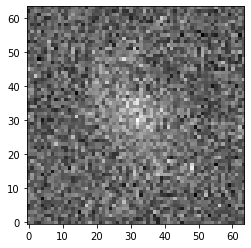

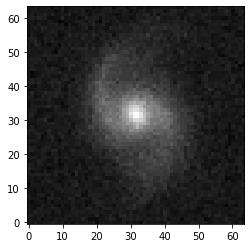

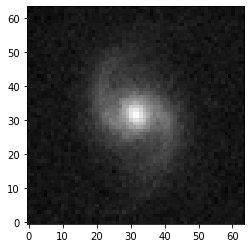

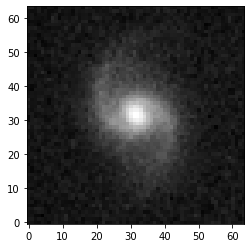

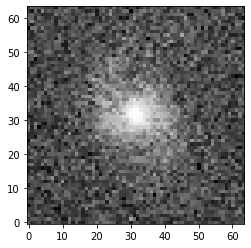

In [19]:
# COMPLETE THESE THREE LINES OF CODE
for i in range(5):                # loop over all the wavelength bands
    selected_filter = img_1[:,:,i]      #Select an image in a wavelength band
    scaled_img = np.tanh(selected_filter)  #scale the image using element wise hyperbolic tan
    
    plt.figure()
    plt.imshow(scaled_img, cmap="gray", origin="lower")

Feel free to select other galaxies and plot their images.  
As you can see the galaxy mostly occupies the central region of the picture. So we will crop the images to select only the central 32$\times$32 array elements for each wavelength band and plot them.

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


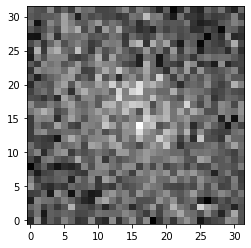

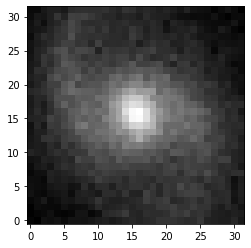

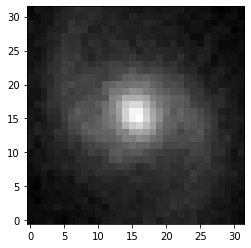

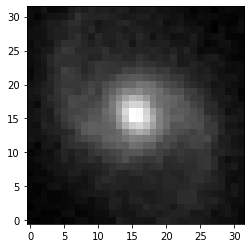

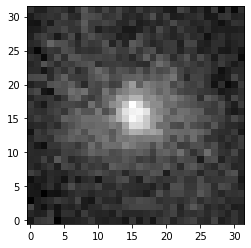

In [20]:
# COMPLETE THESE FOUR LINES OF CODE
for i in range(5): # loop over all the wavelength bands
    selected_filter = img_1[:,:,i]            #Select an image in a wavelength band
    cropped_img = selected_filter[16:-16,16:48]    #Select the central 32x32 elements
    scaled_img =  cropped_img  #scale the image using element wise hyperbolic tan
    
    print(scaled_img.shape)
    plt.figure()
    plt.imshow(scaled_img, cmap="gray", origin="lower")

### Reductions: Numerical operations which return a smaller array

Some numpy functions can take an array as input and return a smaller array as output. An example of such a function would be `np.sum`. If applied on an array, it returns the sum of all elements in the array.

In [21]:
np.sum(arr_2d_1)

21

Such numpy functions also have an argument called `axis`. Alternatively we can specify the axis along which the function will operate. The resulting array will have a dimension less than the original array. The `axis` mentioned in the argument will be the one which is reduced.

In [22]:
arr_2d_1

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
np.sum(arr_2d_1, axis=0)

array([5, 7, 9])

In [24]:
np.sum(arr_2d_1, axis=1)

array([ 6, 15])

An illustrative representation of `np.sum` across various axes from [scipylectures.org](https://scipy-lectures.org/intro/numpy/operations.html#basic-reductions)

<img src="../data/img/reductions.png" height=200px width=200px>

Most common statistical functions are implemented in NumPy and can be used in a similar way. We will use the function `np.mean()` to calculate the average values of the image pixels across all the wavelength ranges and plot the average image for all the given galaxies in a similar way as before.

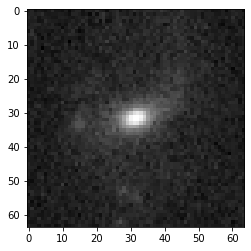

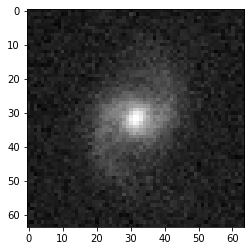

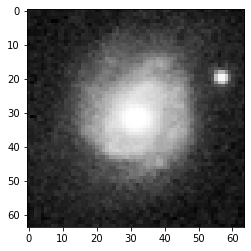

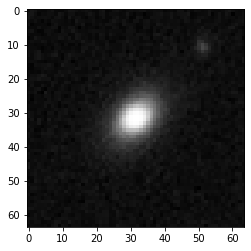

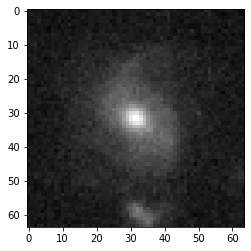

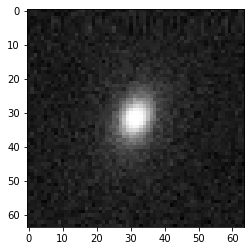

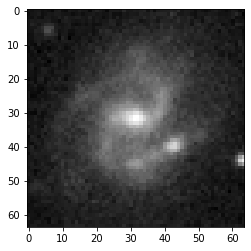

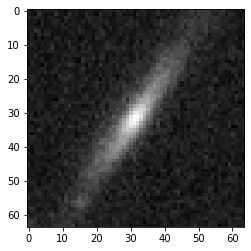

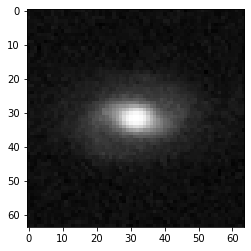

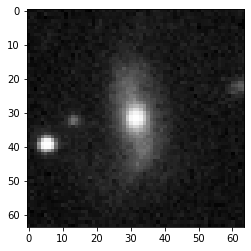

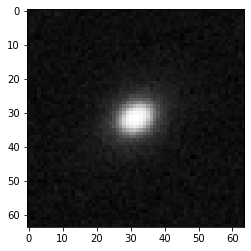

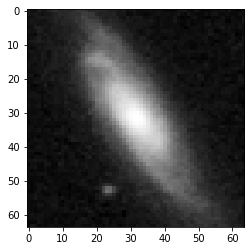

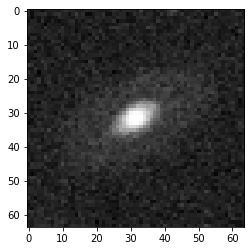

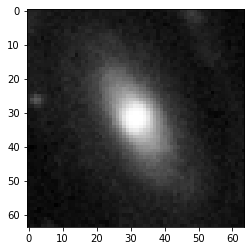

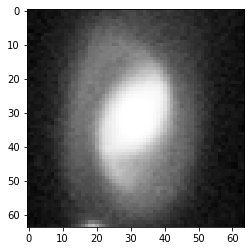

In [25]:
# COMPLETE THESE THREE LINES OF CODE
for i in range(15):                       # loop over all the galaxies in the dataset
    selected_galaxy = imgs[i,:,:,:]            # Select a galaxy from the data set
    mean_img = np.mean(selected_galaxy, axis=-1)                          # Calculate the mean value of all the pixels across observed wavelengths
    scaled_img = np.tanh(mean_img)                      #scale the image using element wise hyperbolic tan
    
    
    plt.figure()
    plt.imshow(scaled_img, cmap="gray")

Want to see more (and prettier) pictures of galaxies?  
Check out [legacysurvey.org](http://legacysurvey.org/viewer)!